#Streaming process problem #1
Analyze 2 days worth of twitter tweets and determine
<ol>
<li/>Popularity ranking of languages:
<ul>
<li/>JavaScript
<li/>Ruby
<li/>Python
</ul>
<li/>Tutorial Links
</ol>

Stream processing problems is derived from
http://adilmoujahid.com/posts/2014/07/twitter-analytics/
https://github.com/adilmoujahid/Twitter_Analytics

## Getting Twitter API Keys
In order to access Twitter Streaming API, we need to get 4 pieces of information from Twitter: 

1) API key, 2) API secret, 3) Access token and 4) Access token secret. 


Follow the steps below to get all 4 elements:
<ol>
<li>Create a twitter account if you do not already have one.
<li>Go to https://apps.twitter.com/ and log in with your twitter credentials.
<li>Click "Create New App"
<ul><li>Fill out the form, agree to the terms, and click "Create your Twitter application"</ul>
<li>I used my github project as a placeholder url and left the callback URL blank.
<li>In the next page, click on "API keys" tab, and copy your "API key" and "API secret".
<li>Scroll down and click "Create my access token", and copy your "Access token" and "Access token secret"
</ol>

## Connecting to Twitter Streaming

Using Tweetpy  - pip install tweepy
or follow instructions on https://github.com/tweepy/tweepy

Copy the following code into your own file twitter_streaming_INITIALS.py
Replace with the tokens and keys that you copied in the previous step

In [ ]:
# %load code/twitter_streaming.py
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "ENTER YOUR ACCESS TOKEN"
access_token_secret = "ENTER YOUR ACCESS TOKEN SECRET"
consumer_key = "ENTER YOUR API KEY"
consumer_secret = "ENTER YOUR API SECRET"


#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        print data
        return True

    def on_error(self, status):
        print status


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
    stream.filter(track=['python', 'javascript', 'ruby'])

401
401
401
401

In [ ]:
#%run code/Twitter_Streaming_PS.py

You can stop the program by pressing Ctrl-C.

We want to capture this data into a file that we will use later for the analysis. You can do so by piping the output to a file using the following command: python twitter_streaming.py > twitter_data.txt.

I run the program for 2 days (from 2014/07/15 till 2014/07/17) to get a meaningful data sample. This file size is 242 MB.

##Reading and Understanding the data
The data that we stored twitter_data.txt is in JSON format. JSON stands for JavaScript Object Notation. This format makes it easy to humans to read the data, and for machines to parse it. Below is an example for one tweet in JSON format. You can see that the tweet contains additional information in addition to the main text which in this example: "Yaayyy I learned some JavaScript today! #thatwasntsohard #yesitwas #stoptalkingtoyourself #hashbrown #hashtag".

###Example of a a tweet entry:
{"created_at":"Mon Sep 28 00:59:26 +0000 2015","id":648300950789165056,"id_str":"648300950789165056","text":"Ok. CAMELOT. PLEASE DEAR GOD LET THERE BE A MONTY PYTHON REFERENCE. @OnceABC  #itIsASillyPlace","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":930666258,"id_str":"930666258","name":"BJ CLAY","screen_name":"BJCLAY2779","location":"Huntington, WV","url":null,"description":"Easy going guy. Dad to 5 wonderful boys. Surving Heart Attack victim, at the age of 33. other then that you want to know something ask me.","protected":false,"verified":false,"followers_count":50,"friends_count":313,"listed_count":1,"favourites_count":45,"statuses_count":156,"created_at":"Tue Nov 06 22:34:29 +0000 2012","utc_offset":-14400,"time_zone":"Eastern Time (US & Canada)","geo_enabled":true,"lang":"en","contributors_enabled":false,"is_translator":false,"profile_background_color":"C0DEED","profile_background_image_url":"http:\/\/abs.twimg.com\/images\/themes\/theme1\/bg.png","profile_background_image_url_https":"https:\/\/abs.twimg.com\/images\/themes\/theme1\/bg.png","profile_background_tile":false,"profile_link_color":"0084B4","profile_sidebar_border_color":"C0DEED","profile_sidebar_fill_color":"DDEEF6","profile_text_color":"333333","profile_use_background_image":true,"profile_image_url":"http:\/\/pbs.twimg.com\/profile_images\/631349246332043264\/Y-V-UZg6_normal.jpg","profile_image_url_https":"https:\/\/pbs.twimg.com\/profile_images\/631349246332043264\/Y-V-UZg6_normal.jpg","profile_banner_url":"https:\/\/pbs.twimg.com\/profile_banners\/930666258\/1397610071","default_profile":true,"default_profile_image":false,"following":null,"follow_request_sent":null,"notifications":null},"geo":null,"coordinates":null,"place":null,"contributors":null,"is_quote_status":false,"retweet_count":0,"favorite_count":0,"entities":{"hashtags":[{"text":"itIsASillyPlace","indices":[78,94]}],"urls":[],"user_mentions":[{"screen_name":"OnceABC","name":"Once Upon A Time","id":287858728,"id_str":"287858728","indices":[68,76]}],"symbols":[]},"favorited":false,"retweeted":false,"filter_level":"low","lang":"en","timestamp_ms":"1443401966174"}

Appears to be json formatted data.  We will need pandas, json and re to parse this info.
I created a small 5 minute sample

In [3]:
import json
import pandas as pd
tweets_data_path = 'data/twitterdata.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
print len(tweets_data)

tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['time_zone'] = map(lambda tweet: tweet['user']['time_zone'], tweets_data)
tweets_by_lang = tweets['lang'].value_counts()
tweets

1290


,text,lang,time_zone
0,Indonesia adalah Tempat ditemukannya ular terp...,in,Jakarta
1,RT @WlSHlNGWELLS: Omg my sister met ruby rose wtf,en,Mid-Atlantic
2,RT @AntiquingOnLine: #Vintage 14K Ruby Red Gar...,en,None
3,RT @AntiquingOnLine: #Vintage 14K Ruby Red Gar...,en,Eastern Time (US & Canada)
4,RT @AntiquingOnLine: #Vintage 14K Ruby Red Gar...,en,Eastern Time (US & Canada)
5,RT @Rubiu5: WTF JAJAJA POR QUE TIENES UNA GALL...,es,None
6,Python使いたくないのにPython使う場面がどんどん増えて知識が増えてる感じが悲しくて...,ja,Tokyo
7,😍😍😍 ruby rubybrushhslabsjd https://t.co/Wks...,en,Santiago
8,組み込みシステム構成法は、『AVRマイコンとPythonではじめよう IoTデバイス設計・実...,ja,Tokyo
9,My client is rocking her ruby red! #salonhair...,en,Eastern Time (US & Canada)


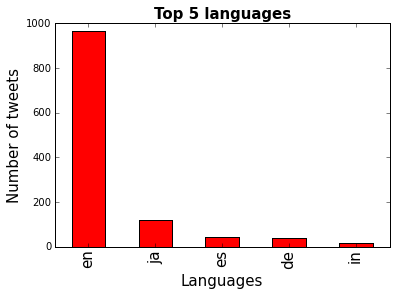

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

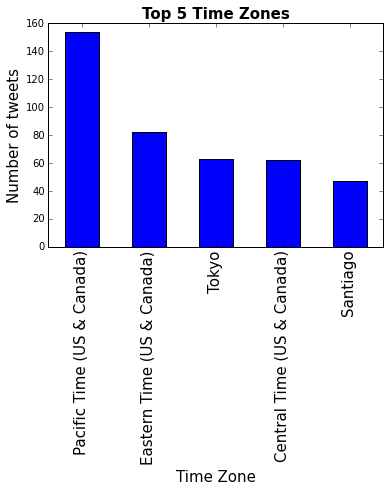

In [5]:
tweets_by_country = tweets['time_zone'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Time Zone', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 Time Zones', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

##Mining the tweets
Our main goals in these text mining tasks are: compare the popularity of Python, Ruby and Javascript programming languages and to retrieve programming tutorial links. We will do this in 3 steps:

We will add tags to our tweets DataFrame in order to be able to manipualte the data easily.
Target tweets that have "pogramming" or "tutorial" keywords.
Extract links from the relevants tweets

In [6]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

tweets['python'] = tweets['text'].apply(lambda tweet: word_in_text('python', tweet))
tweets['javascript'] = tweets['text'].apply(lambda tweet: word_in_text('javascript', tweet))
tweets['ruby'] = tweets['text'].apply(lambda tweet: word_in_text('ruby', tweet))
print tweets['python'].value_counts()[True]
print tweets['javascript'].value_counts()[True]
print tweets['ruby'].value_counts()[True]

316
398
511


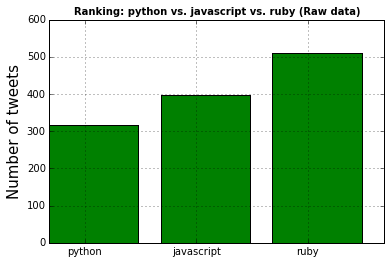

In [7]:
prg_langs = ['python', 'javascript', 'ruby']
tweets_by_prg_lang = [tweets['python'].value_counts()[True], tweets['javascript'].value_counts()[True], tweets['ruby'].value_counts()[True]]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. javascript vs. ruby (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

## Extracting relevant links
Now that we extracted the relevant tweets, we want to retrieve links to programming tutorials. We will start by creating a function that uses regular expressions for retrieving link that start with "http://" or "https://" from a text. This function will return the url if found, otherwise it returns an empty string.

In [8]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''
# add a column called link to our tweets DataFrame. This column will contain the urls information.
tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))

tweets['programming'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet))
tweets['tutorial'] = tweets['text'].apply(lambda tweet: word_in_text('tutorial', tweet))

tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet) or word_in_text('tutorial', tweet))

print tweets['programming'].value_counts()[True]
#print tweets['tutorial'].value_counts()[True]
print tweets['relevant'].value_counts()[True]

tweets_relevant = tweets[tweets['relevant'] == True]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']

print tweets_relevant_with_link[tweets_relevant_with_link['python'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['javascript'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['ruby'] == True]['link']


37
41
350     https://t.co/miI5ZOhmfG
399      http://t.co/r4HydQV3NP
413      http://t.co/02Q63DetzC
480      http://t.co/HklrTDvoh2
586     https://t.co/JC41kA7b1V
638      http://t.co/vzcGYr9ize
662      http://t.co/X28iiNJna0
707     https://t.co/s9k5DrtPzn
823      http://t.co/5M2pv1tVUn
842      http://t.co/M2HZQSLbA4
1214    https://t.co/e8haQU5SpP
1238     http://t.co/HklrTDvoh2
Name: link, dtype: object
192     http://t.co/gLLBygH7SG
194     http://t.co/gLLBygH7SG
257     http://t.co/4JiSHBLNF6
258     http://t.co/l5S03Jfj4E
282     http://t.co/IipBRbe3Kg
453     http://t.co/hZqpkd81nE
455     http://t.co/hZqpkd81nE
718     http://t.co/IdFIw1SKpQ
1004    http://t.co/9fP5itxTVm
1050    http://t.co/dLFsYzhkgE
1098    http://t.co/1Xm3UNY0Gz
1189    http://t.co/P8ZFt0yeyq
1192    http://t.co/rxlvsHIaOb
1267    http://t.co/N7VaGkKdUn
Name: link, dtype: object
187    http://t.co/xvbUQHnxUC
253    http://t.co/xvbUQHnxUC
260    http://t.co/q44BQdxgEq
282    http://t.co/IipBRbe3Kg
761 